In [130]:
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent

path = "../latex/figures/"
ratinabox.stylize_plots()
ratinabox.autosave_plots = False
ratinabox.figure_directory = path 

In [131]:
import torch 
from torch.utils.data import TensorDataset, DataLoader

In [132]:
batch_size = 10
seq_length = 10
# filename = "../data/tensor.pt"
x = torch.zeros([batch_size, seq_length, 2], dtype=torch.float32)
y = torch.zeros([batch_size, seq_length, 2], dtype=torch.float32)
for i in range(batch_size):
    env = Environment()
    ag = Agent(env)

    for _ in range(seq_length):
        ag.update()

    x[i, :, :] = torch.tensor(ag.history["vel"])
    y[i, :, :] = torch.tensor(ag.history["pos"])

In [133]:
# Pre-process data? If so, do it before creating a dataloader:

In [134]:
joint_data = TensorDataset(x, y)
data_loader = DataLoader(dataset=joint_data, batch_size=batch_size, shuffle=True)

In [135]:
# print(joint_data.shape)
# for e in data_loader:
#     print(f"x: {e[0]} \ty: {e[1]}")
# print(data_loader)

In [136]:
import torch.nn as nn 
learning_rate = 0.01
num_epochs = 200
hidden_size = 7

loss_func = nn.MSELoss(reduction="mean")
input_size = 2
output_size = 2
model = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True, device="cpu")
decoder = nn.Linear(in_features=hidden_size, out_features=2, bias=False)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [137]:
for epoch in range(num_epochs):
    for x_batch, y_batch in data_loader:
        # Get the predicted element equivalent to model(x_batch)[:, 0]
        out_h, hh = model(x_batch)
        y_tilde = decoder(out_h)
        
        # Calculate the loss using the correct dimension
        loss = loss_func(y_tilde, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Loss {loss.item():.4f}")

Epoch 0 - Loss 0.1885
Epoch 10 - Loss 0.1008
Epoch 20 - Loss 0.0926
Epoch 30 - Loss 0.0880
Epoch 40 - Loss 0.0850
Epoch 50 - Loss 0.0834
Epoch 60 - Loss 0.0818
Epoch 70 - Loss 0.0804
Epoch 80 - Loss 0.0789
Epoch 90 - Loss 0.0774
Epoch 100 - Loss 0.0758
Epoch 110 - Loss 0.0740
Epoch 120 - Loss 0.0724
Epoch 130 - Loss 0.0711
Epoch 140 - Loss 0.0705
Epoch 150 - Loss 0.0703
Epoch 160 - Loss 0.0700
Epoch 170 - Loss 0.0698
Epoch 180 - Loss 0.0696
Epoch 190 - Loss 0.0693


In [138]:
print(f"Final parameters: \n{model.get_parameter("weight_hh_l0")}")

Final parameters: 
Parameter containing:
tensor([[ 0.1724, -0.1250,  0.2072,  0.0754, -0.5647, -0.2983,  0.2464],
        [-0.0325,  0.0788,  0.3482,  0.3240,  0.1991, -0.1280, -0.0411],
        [-0.2819, -0.1946, -0.1826, -0.2290,  0.6963, -0.0125, -0.3485],
        [-0.1102,  0.2959, -0.1769,  0.0104,  0.0740,  0.0656,  0.3512],
        [-0.0530,  0.5506,  0.0928,  0.0869,  0.5118, -0.1982,  0.0176],
        [-0.2265, -0.0243, -0.1660, -0.3903, -0.4364, -0.0331,  0.2918],
        [-0.0861,  0.2550, -0.0671,  0.1549,  0.0787, -0.3048,  0.1203]],
       requires_grad=True)


In [141]:
import matplotlib.pyplot as plt
pred_traj = y_tilde.detach().numpy()
true_traj = y_batch.detach().numpy()
pred_traj.shape

(10, 10, 2)

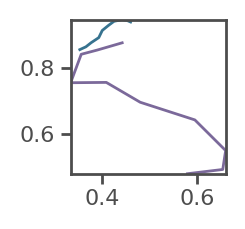

In [143]:
fig, ax = plt.subplots()
ax.plot(pred_traj[1, :, 0], pred_traj[1, :, 1])
ax.plot(true_traj[1, :, 0], true_traj[1, :, 1])

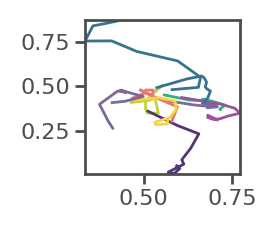

In [140]:
fig, ax = plt.subplots()
for i in range(batch_size):
    x = pred_traj[i, :, 0]
    y = pred_traj[i, :, 1]
    ax.plot(x, y)